In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 회귀(Regression)

- 모델 파라미터 
    - 기울기(가중치 weight, 계수 coefficient) : coef_
    - 절편(bias) : intercept_
    
    
    
- 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 예를들면 아파트의 방 개수, 화장실 크기 등의 독립변수에 따라서 아파트 가격인 종속변수가 어떤 관계를 가지는지를 모델링하고 예측하는 것


    
```
선형 분석은 영국의 유전학자 Francis Galton이 유전의 법칙을 연구하다 나온 것에 기인하게 된다. 
연구의 내용은 부모와 자녀의 키 사이의 관계 였는데 연구결과로, 
아버지와 어머니의 키의 평균을 조사하여 표로 나타낸 결과 자녀의 키는 엄청 크거나 작은 것이 아닌 
그 세대의 평균으로 돌아가려는 경향이 있다는 것을 발견하였다.
Galton은 이를 회귀 분석(Regression Analysis) 라고 명칭하였다.
```

# 농어의 길이와 무게

#### 데이타준비  http://bit.ly/perch_data

In [5]:
from sklearn.model_selection import train_test_split

# from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [3]:
# reshape()없이도 DataFrame만들기
perch_length1 = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight1 = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [6]:
#flatten 없이 사용하기
perch_df = pd.DataFrame(columns=['length','weight'])
perch_df['length'] = perch_length1
perch_df['weight'] = perch_weight1
perch_df.head(3)

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0


In [7]:
#reshape(-1,1)을 통해서 1열로 만들어주기 
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ).reshape(-1, 1)

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ).reshape(-1, 1)

In [8]:
perch_df = pd.DataFrame(columns=['length','weight'])
perch_df['length'] = perch_length.flatten() 
perch_df['weight'] = perch_weight.flatten() 
perch_df.head(3)

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0


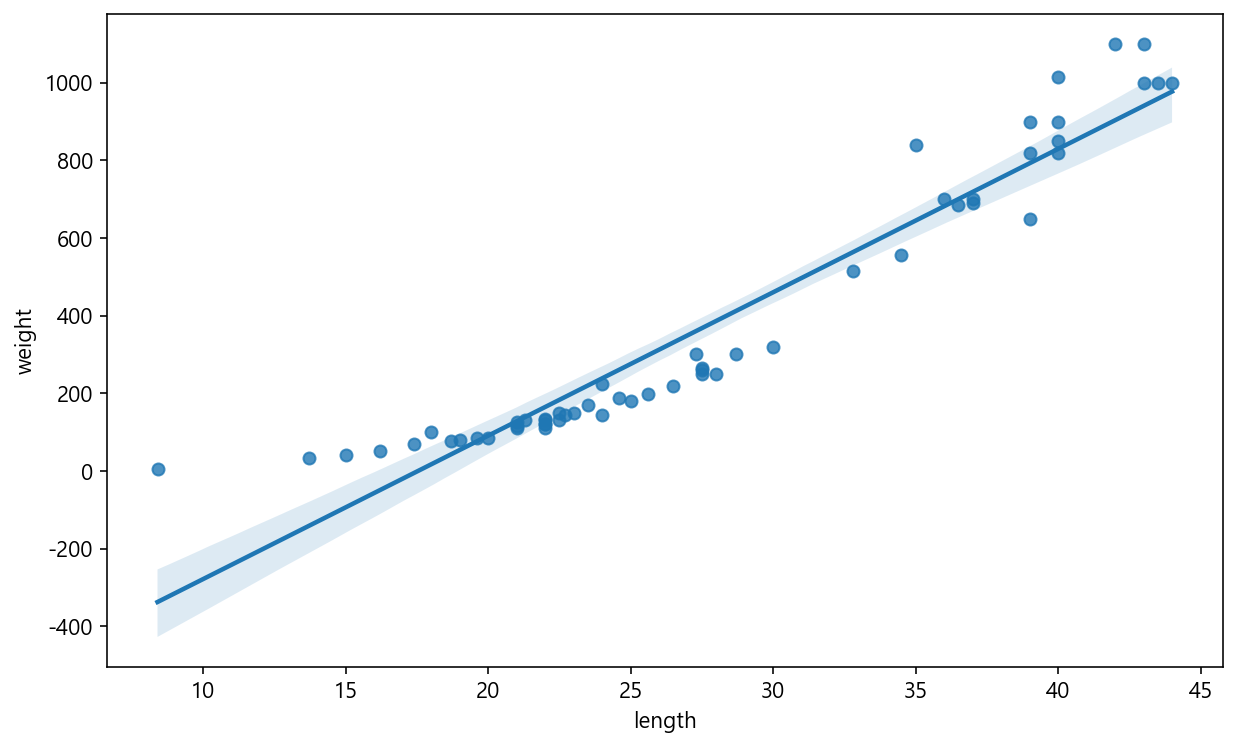

In [9]:
#regplot은 seabonr에 있는 그래프 도구중 하나로 회귀선, 산점도를 보여주는 그래프 
sns.regplot(x='length' , y='weight',data=perch_df);

In [10]:
# ndim을 통해서 차원 확인하기, shape를 통해서 구조 확인하기 
perch_length.ndim, perch_weight.ndim, perch_length.shape, perch_weight.shape

(2, 2, (56, 1), (56, 1))

In [11]:
print(perch_length[:3])
print()
print(perch_weight[:3])

[[ 8.4]
 [13.7]
 [15. ]]

[[ 5.9]
 [32. ]
 [40. ]]


In [12]:
# train_test_split을 통해서 학습데이타와 테스트 데이타 분리하기 
# test_size= 0.25가 기본값이다. 
# 2차원 



X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# 학습시키기
model_lr = LinearRegression()
# 
model_lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# params로 확인하기 
model_lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [16]:
# 50을 예측해본 결과 1241.83860323 
print(model_lr.predict([[50]]))

[[1241.83860323]]


In [17]:
# 기울기(가중치 weight, 계수 coefficient) : coef_
# 절편(bias) : intercept_ 


print(model_lr.coef_, model_lr.intercept_)

[[39.01714496]] [-709.01864495]


In [18]:
# 값을 찾기 위해서는 ndarray인 model_lr.coef_에서 [0,0]으로 
model_lr.coef_[0,0]

39.01714496363019

In [19]:
X_train.min(), X_train.max()

(13.7, 44.0)

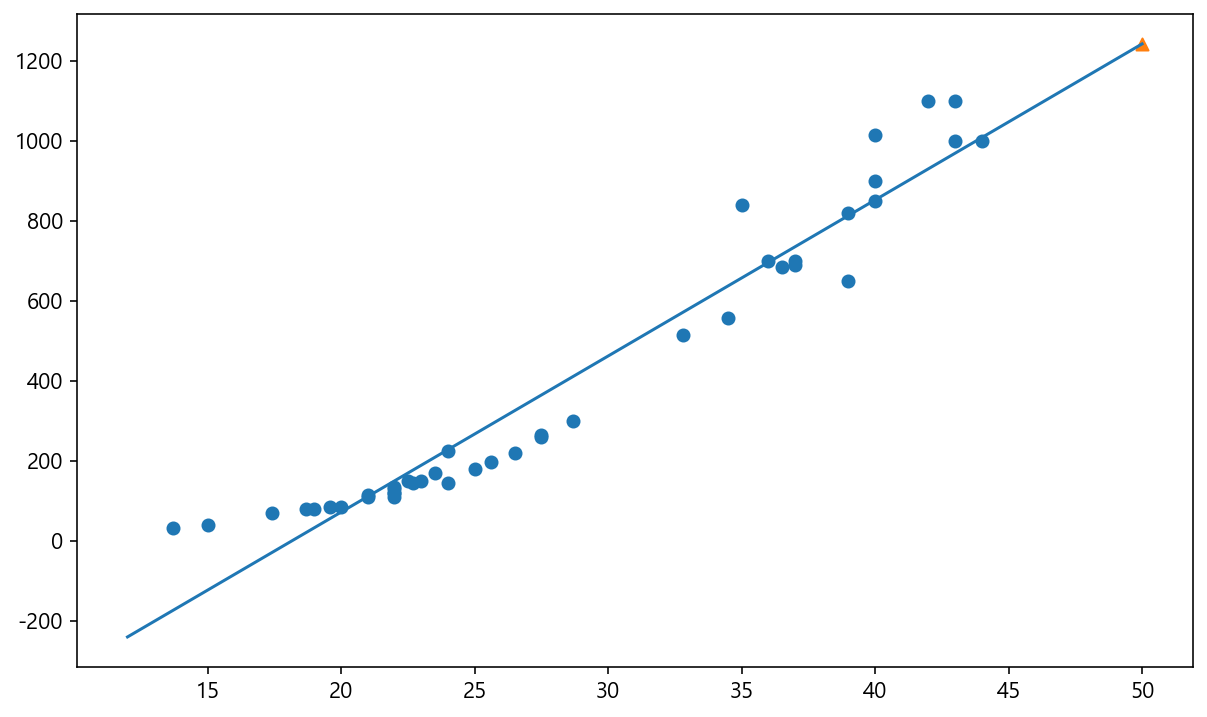

In [20]:
# 위의 데이터를 사용해서 seabonr이 아닌 matplotlib으로 그리기 
plt.scatter(X_train, y_train)

# 회귀선
plt.plot([12, 50], [12*model_lr.coef_[0,0] + model_lr.intercept_ , 50*model_lr.coef_[0,0] + model_lr.intercept_ ])

# 새로운 데이타 50, 
plt.scatter(50, 1241.8, marker='^')
plt.show()


In [21]:
print( model_lr.score(X_train, y_train))
print( model_lr.score(X_test, y_test))

0.9398463339976041
0.824750312331356


# 선형회귀 평가지표 

- MAE, MSE, RMSE, MSLE, RMSLE
- R²

```
실제 값과 회귀 예측값의 차이를 기반으로 한다.  
MAE, MSE, RMSE, MSLE, RMSLE는 값이 작을수록 회귀 성능이 좋은 것이다. 
값이 작을수록 예측값과 실제값의 차이가 없다는 뜻
반면, R² 는 값이 클수록 성능이 좋다.
```

```
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

MAE =  mean_absolute_error(y_test, model.predict(X_test))

MSE = mean_squared_error(y_test, model.predict(X_test))

RMSE = np.sqrt(MSE)

MSLE = mean_squared_log_error(y_test, model.predict(X_test))

RMSLE = np.sqrt(mean_squared_log_error(y_test, model.predict(X_test)))

R2 = r2_score(y_test, model.predict(X_test))
```

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MAE =  mean_absolute_error(y_test, model_lr.predict(X_test))
MSE =  mean_squared_error(y_test, model_lr.predict(X_test))
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, model_lr.predict(X_test))

print(f'MAE =  {MAE}')
print(f'MSE =  {MSE}')
print(f'RMSE =  {RMSE}')
print(f'R2 =  {R2}')

MAE =  94.46122937985578
MSE =  17590.26597788917
RMSE =  132.62830006408575
R2 =  0.824750312331356


# 퀴즈 

보스턴 주택 가격데이타를 스케일링한 후 선형회귀 모델을 정의하고 테스트하여라 


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston


In [24]:
boston = load_boston()

In [25]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

In [26]:
bostonDF['PRICE'] = boston.target

In [27]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [28]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
X = bostonDF.loc[:,:'LSTAT']
y = bostonDF['PRICE']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [31]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
mse, rmse

(17.29691590790211, 4.15895610795571)

In [33]:
# Scaler 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = boston.feature_names)
X_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [34]:
X_scaled_train, X_sclaed_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [35]:
X_scaled_train.shape, X_sclaed_test.shape

((354, 13), (152, 13))

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_scaled_train, y_train)
y_preds = lr.predict(X_sclaed_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
mse, rmse

(21.517444231177272, 4.638689926172828)